Jumlah Data (baris, kolom): (7444, 4)

 Nama Kolom:
['Umur (bulan)', 'Jenis Kelamin', 'Tinggi Badan (cm)', 'Status Gizi']

 Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 7444 entries, 0 to 9998
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Umur (bulan)       7444 non-null   int64  
 1   Jenis Kelamin      7444 non-null   object 
 2   Tinggi Badan (cm)  7444 non-null   float64
 3   Status Gizi        7444 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 290.8+ KB

 Statistik Deskriptif (Numerik):
       Umur (bulan)  Tinggi Badan (cm)
count   7444.000000        7444.000000
mean      11.161204          56.869899
std       16.570065           8.859150
min        0.000000          40.010437
25%        1.000000          49.936048
50%        2.000000          55.910099
75%       20.000000          63.701540
max       60.000000          80.000000

 Tabel Preview Dat

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,60,laki-laki,44.591973,stunted
1,60,laki-laki,56.705203,tinggi
2,60,laki-laki,46.863358,normal
3,60,laki-laki,47.508026,normal
4,60,laki-laki,42.743494,severely stunted


<ipython-input-70-2933392143>:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




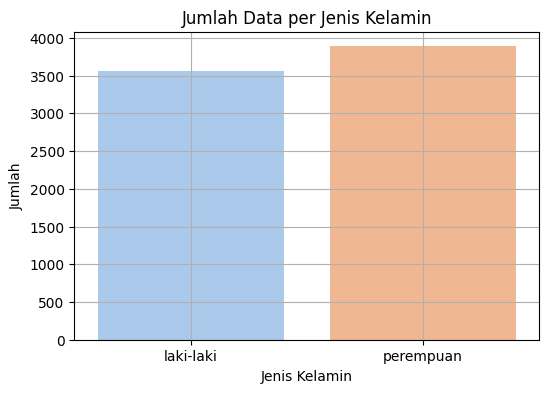

In [ ]:
# 3. EDA & Visualisasi

# 1. Statistik Ringkas
print("Jumlah Data (baris, kolom):", df.shape)
print("\n Nama Kolom:")
print(df.columns.tolist())

print("\n Informasi Dataset:")
df.info()

print("\n Statistik Deskriptif (Numerik):")
print(df.describe())

# 2. Preview Dataset (5 data pertama)
print("\n Tabel Preview Dataset:")
display(df.head())

# 3. Visualisasi Awal

import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart jumlah data berdasarkan Jenis Kelamin
if 'Jenis Kelamin' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x='Jenis Kelamin', palette='pastel')
    plt.title('Jumlah Data per Jenis Kelamin')
    plt.xlabel('Jenis Kelamin')
    plt.ylabel('Jumlah')
    plt.grid(True)
    plt.show()


Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Umur (bulan)       9999 non-null   int64  
 1   Jenis Kelamin      9997 non-null   object 
 2   Tinggi Badan (cm)  9999 non-null   float64
 3   Status Gizi        9990 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 312.6+ KB
None

Statistik Deskriptif:
       Umur (bulan)  Tinggi Badan (cm)
count   9999.000000        9999.000000
mean       9.197320          58.252523
std       14.705816           9.019736
min        0.000000          40.010437
25%        2.000000          51.200000
50%        3.000000          57.400000
75%        4.000000          65.500000
max       60.000000          80.000000

Contoh Data:
   Umur (bulan) Jenis Kelamin  Tinggi Badan (cm)       Status Gizi
0            60     laki-laki          44.591973           stunted
1

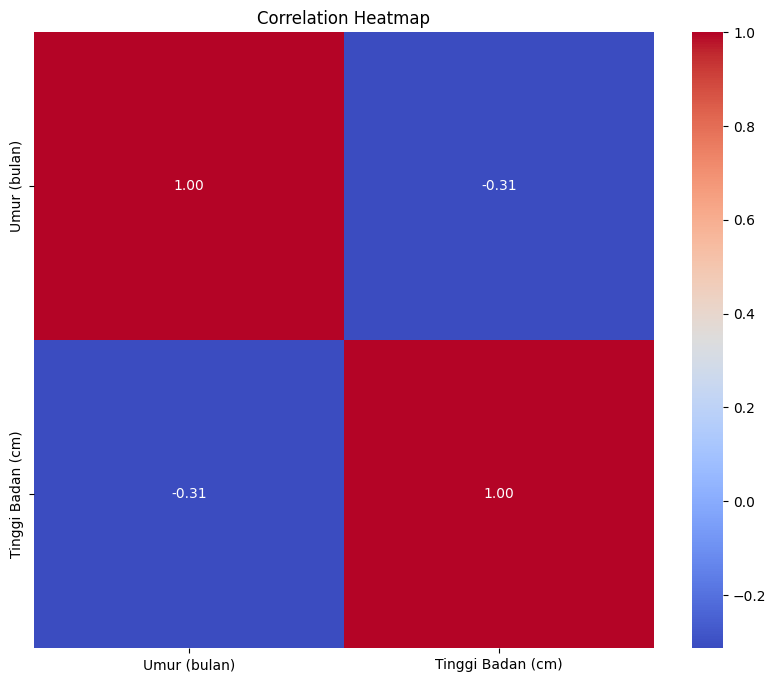

interactive(children=(IntSlider(value=0, description='umur_min', max=60), IntSlider(value=60, description='umu…

interactive(children=(Dropdown(description='Jenis Kelamin:', options=('laki-laki', 'perempuan', nan), value='l…

In [ ]:
# 1. Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from google.colab import files
from ipywidgets import interact, IntSlider, Dropdown

# 2. Load Dataset
df = "/content/data_balita.csv"
df = pd.read_csv(df)

# 3. Tampilkan Info Dasar
print("Info Dataset:")
print(df.info())
print("\nStatistik Deskriptif:")
print(df.describe())
print("\nContoh Data:")
print(df.head())

# 4. Scatter Plot Interaktif
fig1 = px.scatter(
    df,
    x="Umur (bulan)",
    y="Tinggi Badan (cm)",
    color="Jenis Kelamin",
    title="Scatter Plot: Umur (bulan) vs Tinggi Badan (cm)",
    hover_data=df.columns
)
fig1.show()

# 5. Correlation Heatmap
# Pastikan hanya mengambil kolom numerik
df_numeric = df.select_dtypes(include=np.number)
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 6. Filter Interaktif Berdasarkan Rentang Umur (Umur (bulan))
if "Umur (bulan)" in df.columns:
    @interact(umur_min=IntSlider(min=int(df["Umur (bulan)"].min()),
                                 max=int(df["Umur (bulan)"].max()),
                                 step=1,
                                 value=int(df["Umur (bulan)"].min())),
              umur_max=IntSlider(min=int(df["Umur (bulan)"].min()),
                                 max=int(df["Umur (bulan)"].max()),
                                 step=1,
                                 value=int(df["Umur (bulan)"].max())))
    def filter_umur(umur_min, umur_max):
        df_filtered = df[(df["Umur (bulan)"] >= umur_min) & (df["Umur (bulan)"] <= umur_max)]
        fig2 = px.scatter(df_filtered,
                          x="Umur (bulan)",
                          y="Tinggi Badan (cm)",
                          color="Jenis Kelamin",
                          title=f"Filtered Scatter: Umur {umur_min} - {umur_max} bulan",
                          hover_data=df.columns)
        fig2.show()

# 7. Filter Berdasarkan Kategori (Jenis Kelamin)
if "Jenis Kelamin" in df.columns:
    @interact(jenis_kelamin=Dropdown(options=df["Jenis Kelamin"].unique(), description='Jenis Kelamin:'))
    def filter_gender(jenis_kelamin):
        df_filtered = df[df["Jenis Kelamin"] == jenis_kelamin]
        fig3 = px.scatter(df_filtered,
                          x="Umur (bulan)",
                          y="Tinggi Badan (cm)",
                          color="Status Gizi",
                          title=f"Filtered Scatter: Jenis Kelamin = {jenis_kelamin}",
                          hover_data=df.columns)
        fig3.show()


In [ ]:
# 1. Cek Missing Values
print(" Jumlah Missing Values per Kolom:")
print(df.isnull().sum())

# Hapus semua baris yang memiliki nilai NaN di kolom penting
df = df.dropna(subset=["Umur (bulan)", "Tinggi Badan (cm)", "Jenis Kelamin", "Status Gizi"])
print(f"\n Data setelah drop missing: {df.shape}")

# 2. Cek dan Hapus Duplikat
initial_rows = df.shape[0]
df = df.drop_duplicates()
removed_duplicates = initial_rows - df.shape[0]
print(f"\n Duplikat yang Dihapus: {removed_duplicates}")

# 3. Tangani Data Tidak Valid (misal: umur < 0, tinggi badan < 30 cm)
invalid_umur = df[df["Umur (bulan)"] < 0].shape[0]
invalid_tb = df[df["Tinggi Badan (cm)"] < 30].shape[0]
print(f"\n Data tidak valid - Umur < 0: {invalid_umur}")
print(f" Data tidak valid - Tinggi Badan < 30 cm: {invalid_tb}")

# Hapus data tidak valid
df = df[df["Umur (bulan)"] >= 0]
df = df[df["Tinggi Badan (cm)"] >= 30]

# 4. Encoding Fitur Kategorik (Jika Dibutuhkan untuk ML)
# Contoh: encode Jenis Kelamin dan Status Gizi menjadi angka
df_encoded = df.copy()

# Mapping manual
df_encoded["Jenis Kelamin (Encoded)"] = df_encoded["Jenis Kelamin"].map({"Laki-laki": 0, "Perempuan": 1})
status_mapping = {status: i for i, status in enumerate(df_encoded["Status Gizi"].unique())}
df_encoded["Status Gizi (Encoded)"] = df_encoded["Status Gizi"].map(status_mapping)

# Tampilkan hasil
print("\n Skema Encoding:")
print("Jenis Kelamin:", {"Laki-laki": 0, "Perempuan": 1})
print("Status Gizi:", status_mapping)

# Preview data hasil encoding
display(df_encoded.head())


 Jumlah Missing Values per Kolom:
Umur (bulan)         0
Jenis Kelamin        2
Tinggi Badan (cm)    0
Status Gizi          9
dtype: int64

 Data setelah drop missing: (9988, 4)

 Duplikat yang Dihapus: 2544

 Data tidak valid - Umur < 0: 0
 Data tidak valid - Tinggi Badan < 30 cm: 0

 Skema Encoding:
Jenis Kelamin: {'Laki-laki': 0, 'Perempuan': 1}
Status Gizi: {'stunted': 0, 'tinggi': 1, 'normal': 2, 'severely stunted': 3}


,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi,Jenis Kelamin (Encoded),Status Gizi (Encoded)
0,60,laki-laki,44.591973,stunted,NaN,0
1,60,laki-laki,56.705203,tinggi,NaN,1
2,60,laki-laki,46.863358,normal,NaN,2
3,60,laki-laki,47.508026,normal,NaN,2
4,60,laki-laki,42.743494,severely stunted,NaN,3


 Silhouette Score (k=3): 0.544


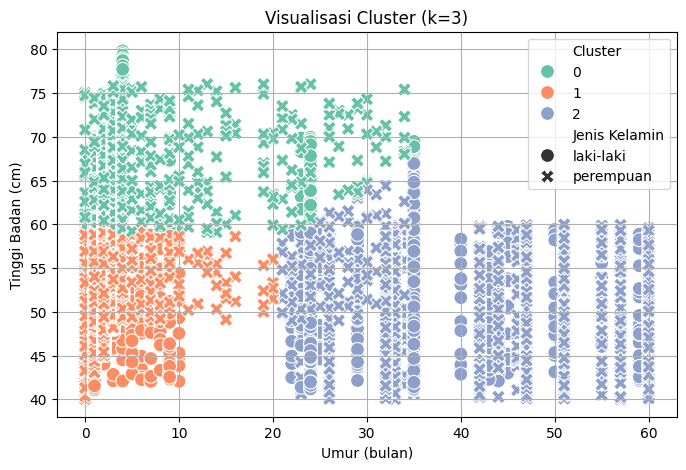

 Tabel Data dengan Label Cluster:


,Umur (bulan),Tinggi Badan (cm),Jenis Kelamin,Status Gizi,Cluster
0,60,44.591973,laki-laki,stunted,2
1,60,56.705203,laki-laki,tinggi,2
2,60,46.863358,laki-laki,normal,2
3,60,47.508026,laki-laki,normal,2
4,60,42.743494,laki-laki,severely stunted,2


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 1. Ambil fitur numerik
X = df[["Umur (bulan)", "Tinggi Badan (cm)"]]

# 2. Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Tentukan jumlah cluster optimal (Elbow Method)
inertia = []
range_k = range(2, 7)  # Coba 2 sampai 6 klaster

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# 4. Pilih k terbaik (k=3)
k_opt = 3
kmeans = KMeans(n_clusters=k_opt, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# 5. Tambahkan hasil klaster ke DataFrame
df_clustered = df.copy()
df_clustered["Cluster"] = cluster_labels

# 6. Evaluasi dengan Silhouette Score
sil_score = silhouette_score(X_scaled, cluster_labels)
print(f" Silhouette Score (k={k_opt}): {sil_score:.3f}")

# 7. Visualisasi Klaster
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_clustered, x="Umur (bulan)", y="Tinggi Badan (cm)",
                hue="Cluster", palette="Set2", style="Jenis Kelamin", s=100)
plt.title(f'Visualisasi Cluster (k={k_opt})')
plt.grid(True)
plt.show()

# 8. Tampilkan Tabel Hasil
print(" Tabel Data dengan Label Cluster:")
display(df_clustered[["Umur (bulan)", "Tinggi Badan (cm)", "Jenis Kelamin", "Status Gizi", "Cluster"]].head())


In [ ]:
# Simpan hasil clustering ke file CSV
df_clustered.to_csv("clean_dataset_balita.csv", index=False)

# Untuk Google Colab: Link download
from google.colab import files
files.download("clean_dataset_balita.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>